In [14]:
from google.colab import drive
drive.mount('/content/drive')
PATH = 'drive/MyDrive/enpm808w-datasets/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
import math
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Read in the data

diabetes = pd.read_csv(PATH + "pima_indians_diabetes.csv")

# Get to know the data a bit

diabetes.info()

diabetes.head()

# Split up the dataset
diabetes_yes = diabetes[(diabetes['outcome'] == 1)]
diabetes_yes.info()

diabetes_no = diabetes[(diabetes['outcome'] == 0)]
diabetes_no.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pregnancies        768 non-null    int64  
 1   glucose            768 non-null    int64  
 2   blood_pressure     768 non-null    int64  
 3   skin_thickness     768 non-null    int64  
 4   insulin            768 non-null    int64  
 5   bmi                768 non-null    float64
 6   diabetes_pedigree  768 non-null    float64
 7   age                768 non-null    int64  
 8   outcome            768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 268 entries, 0 to 766
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pregnancies        268 non-null    int64  
 1   glucose            268 non-null    int64  
 2   blood_pressure  

In [4]:
!wget https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/pima_indians_diabetes.csv --no-check-certificate

--2022-09-20 13:35:24--  https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/pima_indians_diabetes.csv
Resolving tf-assets-prod.s3.amazonaws.com (tf-assets-prod.s3.amazonaws.com)... 52.217.45.220
Connecting to tf-assets-prod.s3.amazonaws.com (tf-assets-prod.s3.amazonaws.com)|52.217.45.220|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23870 (23K) [text/csv]
Saving to: ‘pima_indians_diabetes.csv’

pima_indians_diabet 100%[===================>]  23.31K  --.-KB/s    in 0.001s  

2022-09-20 13:35:24 (21.3 MB/s) - ‘pima_indians_diabetes.csv’ saved [23870/23870]



In [13]:
!ls drive/MyDrive/enpm808w-datasets

all_nyt.zip
avocado-updated-2020.csv
BeerDataScienceProject.zip
bikeshare
birthwt.csv
corpus.txt
datasets_7001_312628_acs2015_county_data.csv
financial_sentimental_analysis_all-data.csv
homeprices.csv
housing
hw3-data
nyt1_sample.csv
pima_indians_diabetes.csv


In [12]:
!mv pima_indians_diabetes.csv drive/MyDrive/enpm808w-datasets/

### Do patients with diabetes have higher insulin levels on average than patients without diabetes?


### Before running the t-test, check whether the samples are normally distributed. You'll do that both visually and through descriptive statistics.

### Using matplotlib.pyplot, you can plot a histogram of each sample. Setting alpha = .5 will reduce the transparency of each histogram so that you can more easily see overlapping areas.

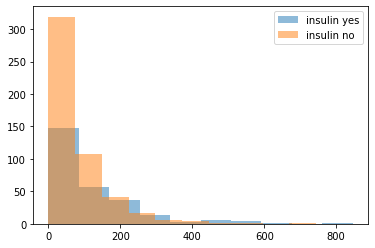

In [ ]:
plt.hist(diabetes_yes['insulin'], alpha = .5, label = "insulin yes")
plt.hist(diabetes_no['insulin'], alpha = .5, label = "insulin no")
plt.legend(loc="upper right")
plt.show()

### clearly not gaussian shape

In [ ]:
print(stats.describe(diabetes_yes['insulin']))
print(stats.describe(diabetes_no['insulin']))

DescribeResult(nobs=268, minmax=(0, 846), mean=100.33582089552239, variance=19234.673318799265, skewness=1.8334954476833978, kurtosis=4.257259307676043)
DescribeResult(nobs=500, minmax=(0, 744), mean=68.792, variance=9774.345426853706, skewness=2.4912385539481763, kurtosis=9.35149885142989)


### as you can see, kurtosis is high

In [ ]:
print(stats.shapiro(diabetes_yes['insulin']))
print(stats.shapiro(diabetes_no['insulin']))

ShapiroResult(statistic=0.7462016344070435, pvalue=5.297208097239903e-20)
ShapiroResult(statistic=0.7162044048309326, pvalue=3.022012305441983e-28)


### we confirm further that pvalue for the shapiro-wilks tests is not less than .05, so reject the hypothesis that the distributions are normal

In [ ]:
stats.kruskal(diabetes_yes['insulin'], diabetes_no['insulin'])

KruskalResult(statistic=3.388974093174831, pvalue=0.06563377481405927)

### Do patients with diabetes have higher glucose levels on average than patients without diabetes?

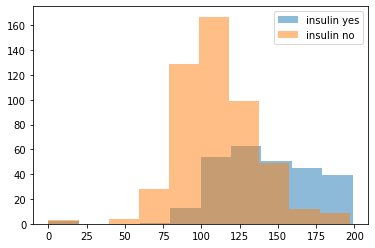

In [ ]:
plt.hist(diabetes_yes['glucose'], alpha = .5, label = "insulin yes")
plt.hist(diabetes_no['glucose'], alpha = .5, label = "insulin no")
plt.legend(loc="upper right")
plt.show()

### More normally distributed.
### We also see 0 values.

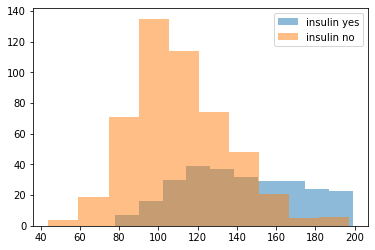

In [ ]:
diabetes_yes_filtered_glucose = diabetes_yes[diabetes_yes['glucose']!= 0]
diabetes_no_filtered_glucose = diabetes_no[diabetes_no['glucose']!= 0]

plt.hist(diabetes_yes_filtered_glucose['glucose'], alpha = .5, label = "insulin yes")
plt.hist(diabetes_no_filtered_glucose['glucose'], alpha = .5, label = "insulin no")
plt.legend(loc="upper right")
plt.show()


In [ ]:
print(stats.describe(diabetes_yes_filtered_glucose['glucose']))
print(stats.describe(diabetes_no_filtered_glucose['glucose']))

DescribeResult(nobs=266, minmax=(78, 199), mean=142.31954887218046, variance=876.1125975315648, skewness=0.09012092392161705, kurtosis=-0.9626447554252175)
DescribeResult(nobs=497, minmax=(44, 197), mean=110.64386317907444, variance=613.8950882715649, skewness=0.6529596223112593, kurtosis=0.6434398312102663)


In [ ]:
print(stats.ttest_ind(diabetes_yes_filtered_glucose['glucose'], diabetes_no_filtered_glucose['glucose']))

Ttest_indResult(statistic=15.700907488875874, pvalue=2.4782891993106313e-48)


### The test statistic is greater than 1.96 or pvalue is less than .05. And is.

In [ ]:
def get_95_ci(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    mean_difference = sample_2_mean - sample_1_mean
    std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    return("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")

In [ ]:
print(get_95_ci(diabetes_yes_filtered_glucose['glucose'], diabetes_no_filtered_glucose['glucose']))

The difference in means at the 95% confidence interval (two-tail) is between -35.846783869363435 and -27.504587516848606.


### You can interpret this result as saying that with 95% confidence, patients without diabetes have glucose levels that are on average between 35.84 mg/dL and 27.50 mg/dL lower than patients with diabetes.

[[Text(0, 0, 'diabetes_yes'), Text(1, 0, 'diabetes_no')]]

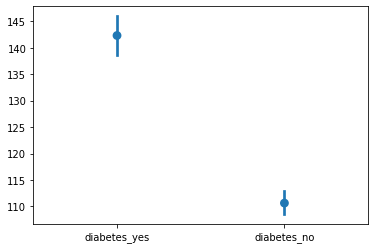

In [ ]:
import seaborn as sns

g = sns.pointplot(data=[diabetes_yes_filtered_glucose['glucose'],
                        diabetes_no_filtered_glucose['glucose']], join=False)
                        
g.set(xticklabels = ['diabetes_yes', 'diabetes_no'])